In [1]:
#importing req. Lib.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from wordcloud import WordCloud

In [2]:
# Basic Operation
import pandas as pd
import numpy as np

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re

from sklearn.model_selection import train_test_split # Split Data 
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics  

# Data Visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings   


warnings.filterwarnings('ignore')
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


#  Library for saving the model
import pickle

# Sentiment Analysis for US Airlines Tweet

In [3]:
df =  pd.read_csv('Tweets.csv')

In [4]:
df.head(10)

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.703061e+17           neutral                        1.0000   
1  5.703011e+17          positive                        0.3486   
2  5.703011e+17           neutral                        0.6837   
3  5.703010e+17          negative                        1.0000   
4  5.703008e+17          negative                        1.0000   
5  5.703008e+17          negative                        1.0000   
6  5.703006e+17          positive                        0.6745   
7  5.703002e+17           neutral                        0.6340   
8  5.703000e+17          positive                        0.6559   
9  5.702955e+17          positive                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   
5     Can't Tell                     0.6842  Virgin America   
6            NaN                     0.0000  Virgin America   
7            NaN                        NaN  Virgin America   
8            NaN                        NaN  Virgin America   
9            NaN                        NaN  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   
5                    NaN    jnardino                 NaN              0   
6                    NaN  cjmcginnis                 NaN              0   
7                    NaN       pilot                 NaN              0   
8                    NaN    dhepburn                 NaN              0   
9                    NaN  YupitsTate                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   
5  @VirginAmerica seriously would pay $30 a fligh...         NaN   
6  @VirginAmerica yes, nearly every time I fly VX...         NaN   
7  @VirginAmerica Really missed a prime opportuni...         NaN   
8    @virginamerica Well, I didn't…but NOW I DO! :-D         NaN   
9  @VirginAmerica it was amazing, and arrived an ...         NaN   

               tweet_created    tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800               NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800               NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800         Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800               NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800               NaN  Pacific Time (US & Canada)  
5  2015-02-24 11:14:33 -0800               NaN  Pacific Time (US & Canada)  
6  2015-02-24 11:13:57 -0800  San Francisco CA  Pacific Time (US & Canada)  
7  2015-02-24 11:12:29 -0800       Los Angeles  Pacific Time (US & Canada)  
8  2015-02-24 11:11:19 -0800         San Diego  Pacific Time (US & Canada)  
9  2015-02-24 10:53:27 -0800       Los Angeles  Eastern Time (US & Canada)

In [5]:
df.tail(10)

tweet_id airline_sentiment  airline_sentiment_confidence  \
14630  5.695885e+17          positive                        1.0000   
14631  5.695885e+17          negative                        1.0000   
14632  5.695878e+17           neutral                        0.6760   
14633  5.695877e+17          negative                        1.0000   
14634  5.695877e+17          negative                        0.6684   
14635  5.695877e+17          positive                        0.3487   
14636  5.695874e+17          negative                        1.0000   
14637  5.695872e+17           neutral                        1.0000   
14638  5.695872e+17          negative                        1.0000   
14639  5.695871e+17           neutral                        0.6771   

               negativereason  negativereason_confidence   airline  \
14630                     NaN                        NaN  American   
14631              Bad Flight                     1.0000  American   
14632                     NaN                     0.0000  American   
14633        Cancelled Flight                     1.0000  American   
14634             Late Flight                     0.6684  American   
14635                     NaN                     0.0000  American   
14636  Customer Service Issue                     1.0000  American   
14637                     NaN                        NaN  American   
14638  Customer Service Issue                     0.6659  American   
14639                     NaN                     0.0000  American   

      airline_sentiment_gold             name negativereason_gold  \
14630                    NaN   Laurelinesblog                 NaN   
14631                    NaN         MDDavis7                 NaN   
14632                    NaN       Chad_SMFYM                 NaN   
14633                    NaN  RussellsWriting                 NaN   
14634                    NaN    GolfWithWoody                 NaN   
14635                    NaN  KristenReenders                 NaN   
14636                    NaN         itsropes                 NaN   
14637                    NaN         sanyabun                 NaN   
14638                    NaN       SraJackson                 NaN   
14639                    NaN        daviddtwu                 NaN   

       retweet_count                                               text  \
14630              0                        @AmericanAir Thanks! He is.   
14631              0  @AmericanAir thx for nothing on getting us out...   
14632              0  “@AmericanAir: @TilleyMonsta George, that does...   
14633              0  @AmericanAir my flight was Cancelled Flightled...   
14634              0         @AmericanAir right on cue with the delays👌   
14635              0  @AmericanAir thank you we got on a different f...   
14636              0  @AmericanAir leaving over 20 minutes Late Flig...   
14637              0  @AmericanAir Please bring American Airlines to...   
14638              0  @AmericanAir you have my money, you change my ...   
14639              0  @AmericanAir we have 8 ppl so we need 2 know h...   

      tweet_coord              tweet_created   tweet_location  \
14630         NaN  2015-02-22 12:04:09 -0800  Chapel Hill, NC   
14631         NaN  2015-02-22 12:04:07 -0800               US   
14632         NaN  2015-02-22 12:01:31 -0800              NaN   
14633         NaN  2015-02-22 12:01:06 -0800      Los Angeles   
14634         NaN  2015-02-22 12:01:02 -0800              NaN   
14635         NaN  2015-02-22 12:01:01 -0800              NaN   
14636         NaN  2015-02-22 11:59:46 -0800            Texas   
14637         NaN  2015-02-22 11:59:15 -0800    Nigeria,lagos   
14638         NaN  2015-02-22 11:59:02 -0800       New Jersey   
14639         NaN  2015-02-22 11:58:51 -0800       dallas, TX   

                    user_timezone  
14630                         NaN  
14631  Eastern Time (US & Canada)  
14632  Central Time (US & Canada)  
14633       

In [6]:
print("Information about the data :", df.info())
print("Shape of the data : ", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [7]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [8]:
df.duplicated().sum()

36

In [9]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [10]:
df.value_counts()

tweet_id      airline_sentiment  airline_sentiment_confidence  negativereason    negativereason_confidence  airline     airline_sentiment_gold  name             negativereason_gold  retweet_count  text                                                                                                              tweet_coord                  tweet_created              tweet_location  user_timezone             
5.677780e+17  negative           1.0000                        Cancelled Flight  1.0000                     United      negative                realmikesmith    Cancelled Flight     0              @united So what do you offer now that my flight was Cancelled Flighted and I'm stranded away from home and work?  [26.37852293, -81.78472152]  2015-02-17 12:10:00 -0800  Chicago         Eastern Time (US & Canada)    1
5.698875e+17  negative           0.8563                        Late Flight       0.5938                     US Airways  negative                ConstanceSCHERE  Late Flight   

In [11]:
# checking unique value 
df.nunique()

tweet_id                        14484
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3022
user_timezone                      85
dtype: int64

In [12]:
# Link acces kaggle
# https://www.kaggle.com/code/bansodesandeep/sentiment-analysis-support-vector-machine
# other source : https://www.kaggle.com/code/jillanisofttech/twitter-us-airline-sentiment-analysis-96-acc 

In [13]:
df.head(3)

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.703061e+17           neutral                        1.0000   
1  5.703011e+17          positive                        0.3486   
2  5.703011e+17           neutral                        0.6837   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                        0.0  Virgin America   
2            NaN                        NaN  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)

# About the data

### Columns 
+ airline_sentiment_confidence : 
+ negativereason : 
+ negativereason_confidence : 
+ airline : 
+ airline_sentiment_gold : 
+ retweet_count : 
+ text : Tweet text 
+ tweet_coord : coordinate 
+ tweet_created : 

# Data Exploration (EDA)

[]

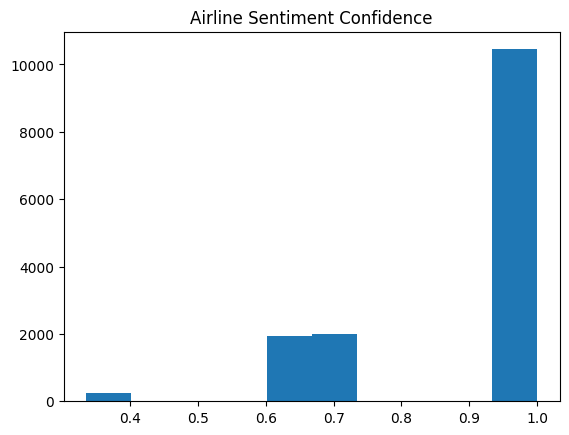

In [14]:
plt.hist(df.airline_sentiment_confidence)
plt.title("Airline Sentiment Confidence")
plt.plot()

[]

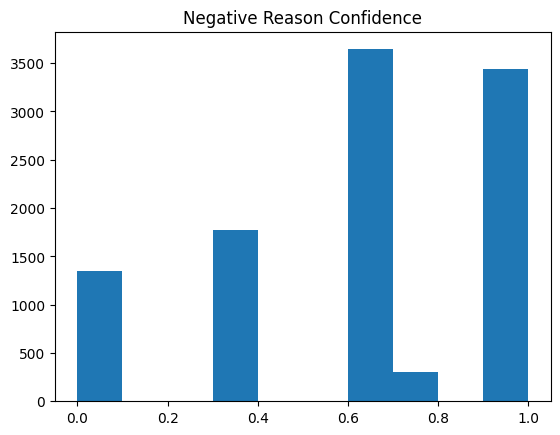

In [15]:
plt.hist(df.negativereason_confidence)
plt.title("Negative Reason Confidence")
plt.plot()

[]

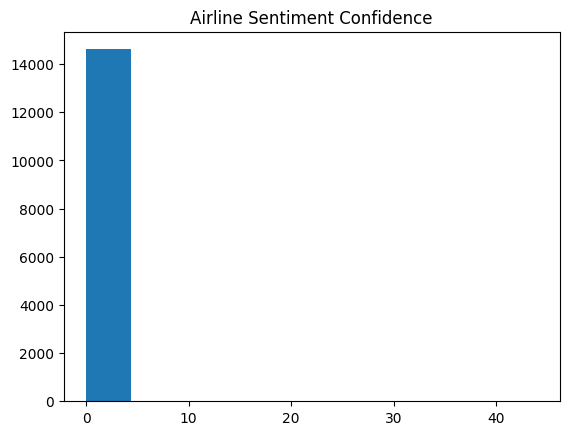

In [16]:
plt.hist(df.retweet_count)
plt.title("Airline Sentiment Confidence")
plt.plot()

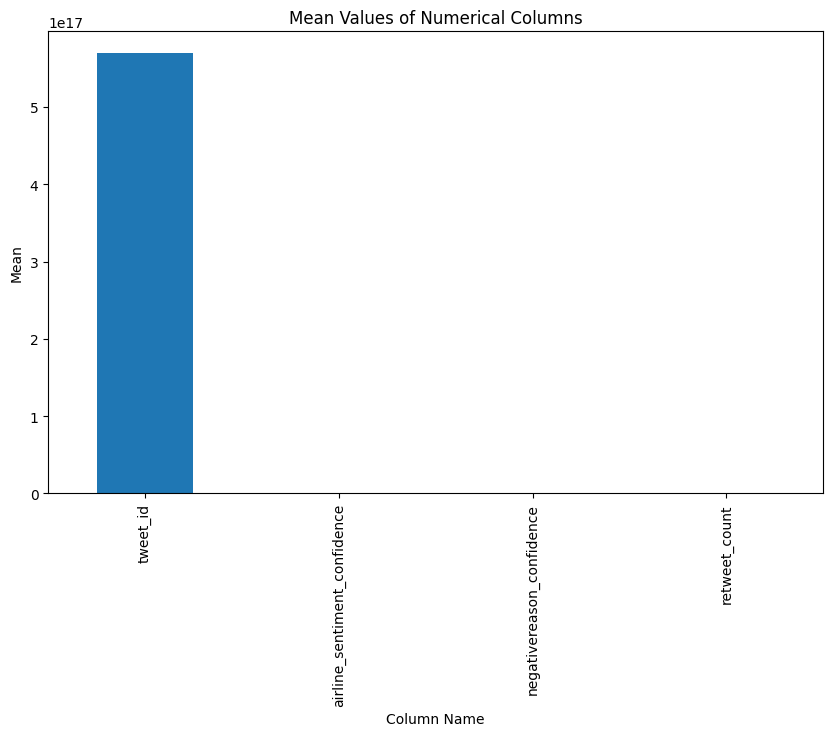

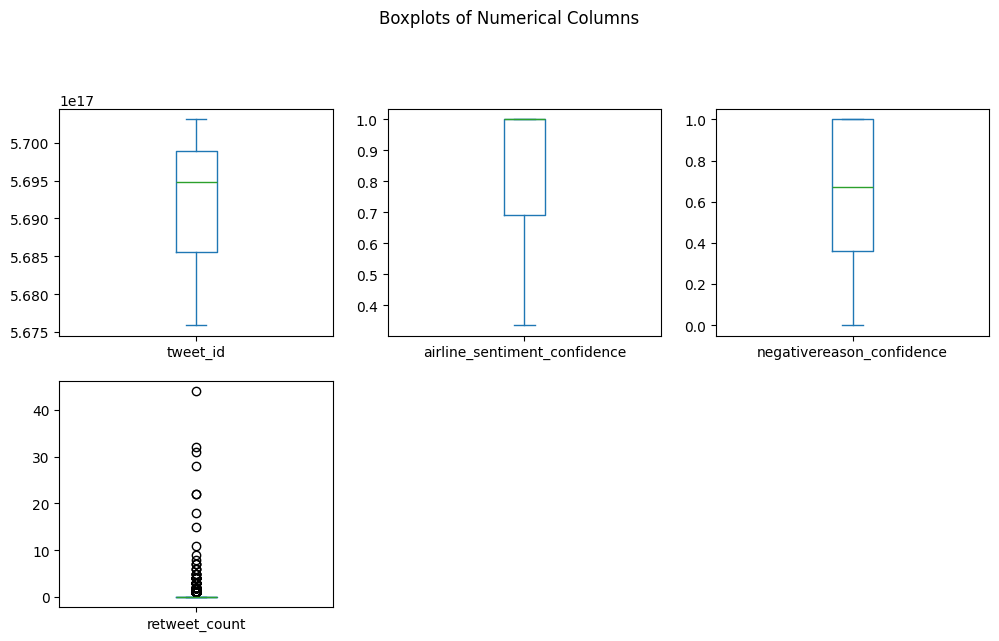

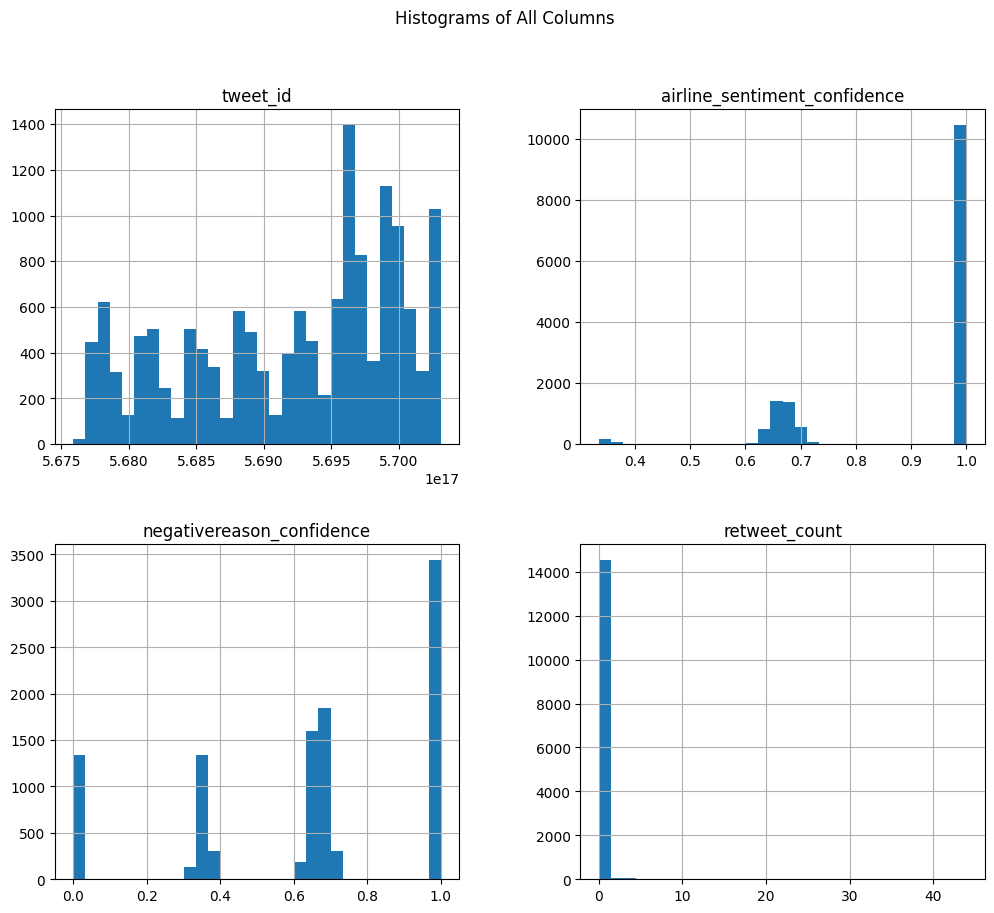

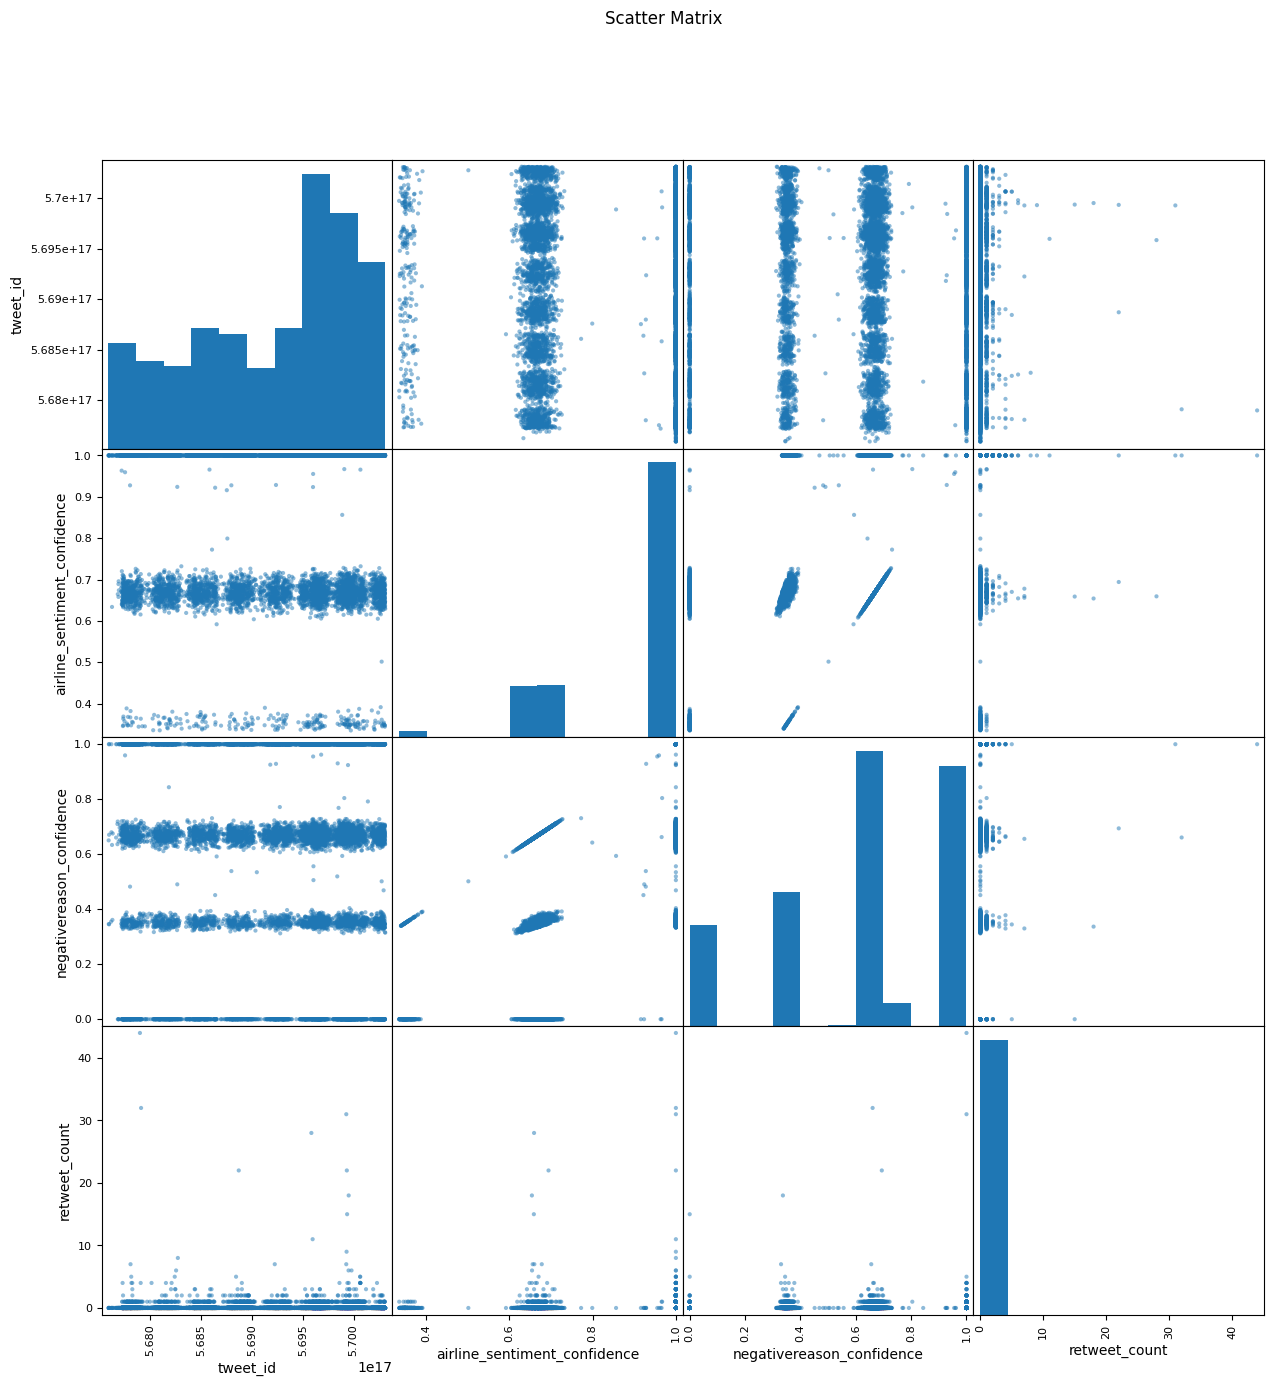

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Summary statistics
summary = df.describe()

# Bar plot for numerical columns
summary.loc['mean'].plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values of Numerical Columns')
plt.ylabel('Mean')
plt.xlabel('Column Name')
plt.show()

# Boxplot for numerical columns
df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 10), sharex=False, sharey=False)
plt.suptitle('Boxplots of Numerical Columns')
plt.show()

# Histograms for all columns
df.hist(figsize=(12, 10), bins=30)
plt.suptitle('Histograms of All Columns')
plt.show()

# Scatter matrix
pd.plotting.scatter_matrix(df, figsize=(15, 15))
plt.suptitle('Scatter Matrix')
plt.show()

Total number of sentiments of tweets : green
airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


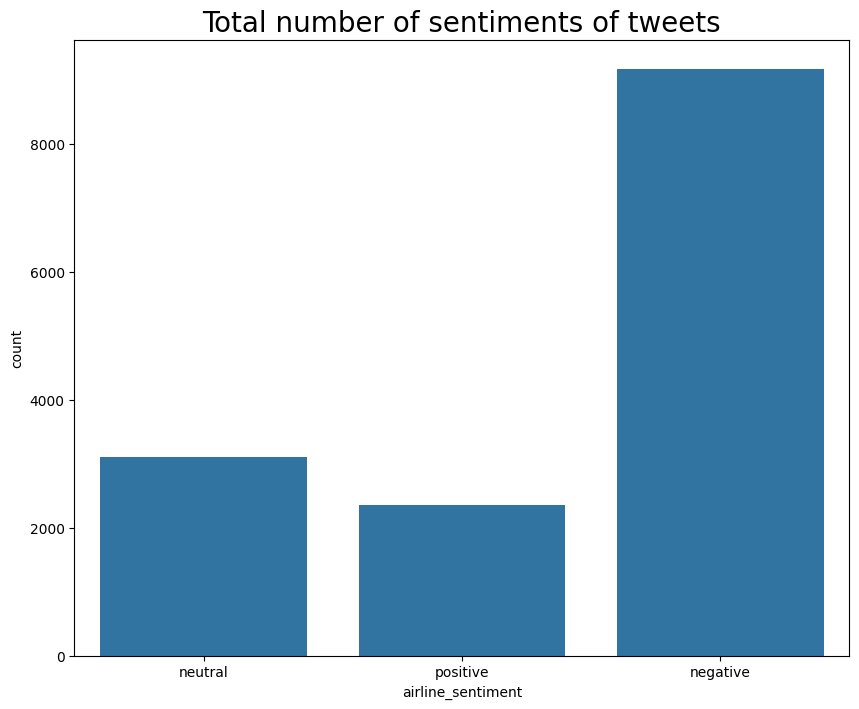

In [18]:
print("Total number of sentiments of tweets :",'green')
print(df.airline_sentiment.value_counts())
plt.figure(figsize = (10, 8))
colors=sns.color_palette('husl',10)
ax = sns.countplot(x = 'airline_sentiment', data = df)
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 20)
plt.show()

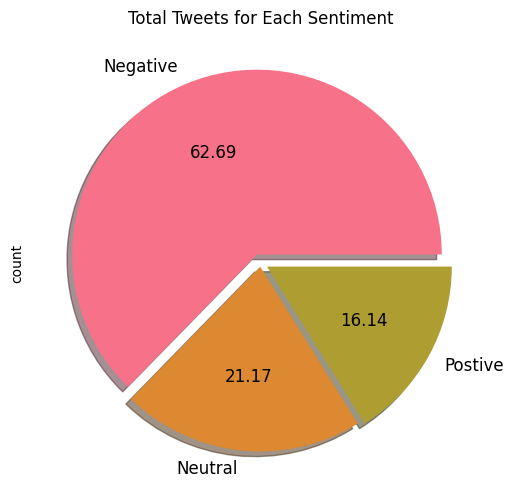

In [19]:
ax.set_title(label = 'Total number of sentiments of tweets:')
colors=sns.color_palette('husl',10)
pd.Series(df['airline_sentiment']).value_counts().plot(kind='pie',colors=colors,labels=['Negative','Neutral','Postive'],explode=[0.05,0.02,0.04],shadow=True,autopct='%.2f',fontsize=12,figsize=(6,6),title="Total Tweets for Each Sentiment")
plt.show()

Text(0, 0.5, 'No.of Tweets')

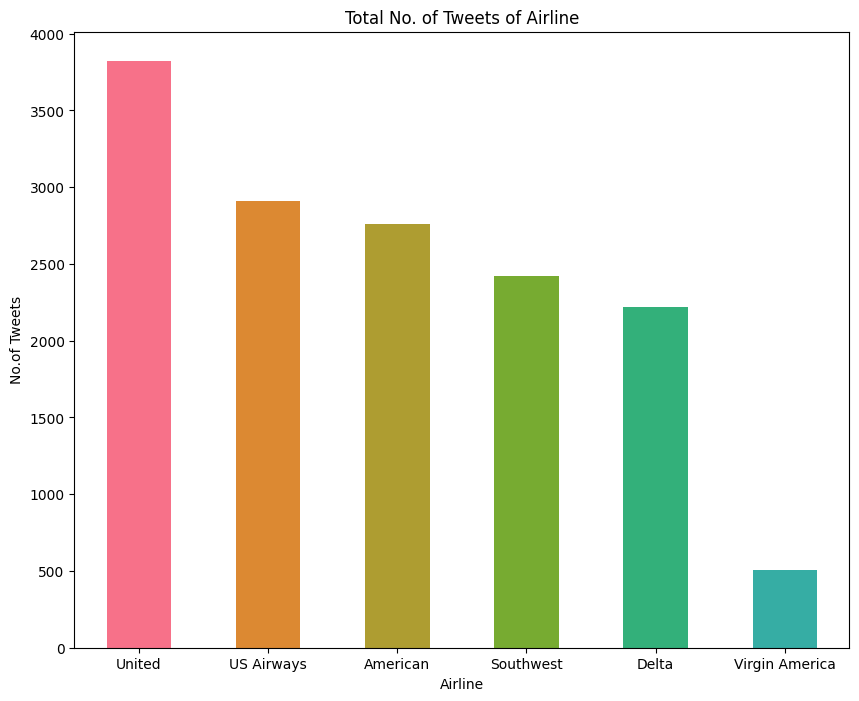

In [20]:
colors=sns.color_palette('husl',10)
pd.Series(df['airline']).value_counts().plot(kind="bar",color=colors,figsize=(10,8),fontsize=10,rot=0,title='Total No. of Tweets of Airline')
plt.xlabel('Airline',fontsize=10)
plt.ylabel('No.of Tweets',fontsize=10)

Total number of tweets for each airline : green
airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


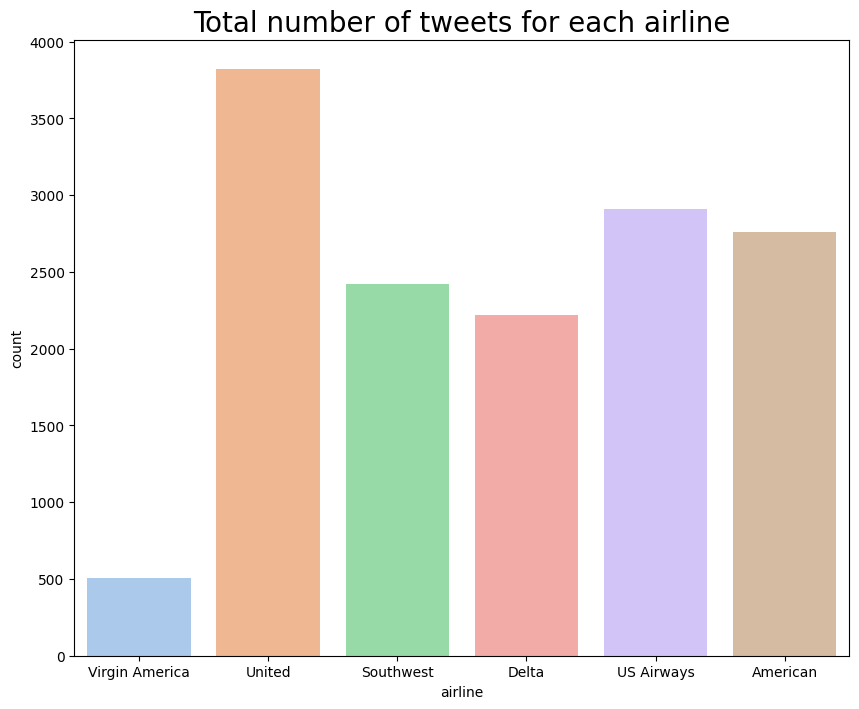

Total number of sentiment tweets for each airline : green
US Airways : 
 airline_sentiment
negative    2263
neutral      381
positive     269
Name: count, dtype: int64
United : 
 airline_sentiment
negative    2633
neutral      697
positive     492
Name: count, dtype: int64
American : 
 airline_sentiment
negative    1960
neutral      463
positive     336
Name: count, dtype: int64
Southwest : 
 airline_sentiment
negative    1186
neutral      664
positive     570
Name: count, dtype: int64
Delta : 
 airline_sentiment
negative    955
neutral     723
positive    544
Name: count, dtype: int64
Virgin America : 
 airline_sentiment
negative    181
neutral     171
positive    152
Name: count, dtype: int64


In [21]:
print("Total number of tweets for each airline :",'green')
print(df.groupby('airline')['airline_sentiment'].count())

plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline', data = df, palette = 'pastel')
ax.set_title(label = 'Total number of tweets for each airline', fontsize = 20)
plt.show()

print("Total number of sentiment tweets for each airline :",'green')
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
for i in airlines :
    print('{} : \n'.format(i),df.loc[df.airline == i].airline_sentiment.value_counts())

### Explore more whats the reason for negative sentiment  

Reasons Of Negative Tweets : green
negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64


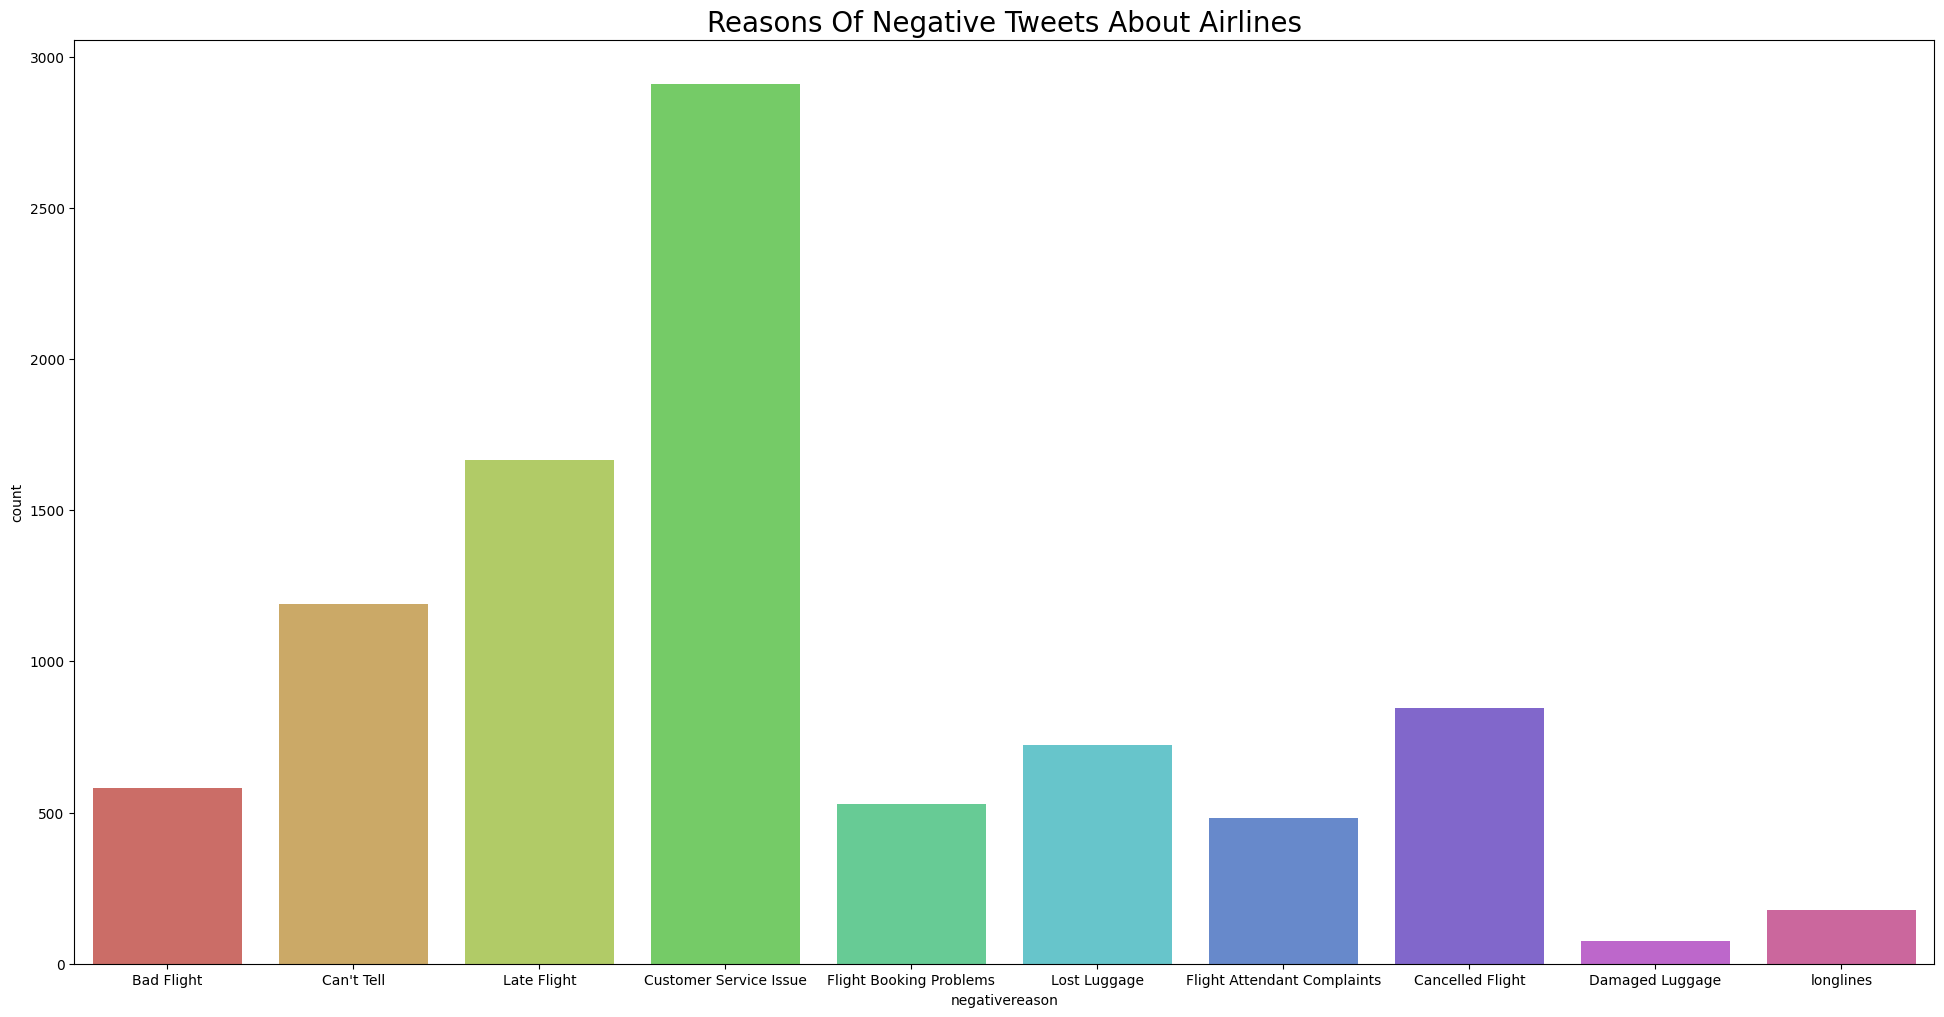

In [22]:
print('Reasons Of Negative Tweets :','green')
print(df.negativereason.value_counts())

plt.figure(figsize = (24, 12))
sns.countplot(x = 'negativereason', data = df, palette = 'hls')
plt.title('Reasons Of Negative Tweets About Airlines', fontsize = 20)
plt.show()

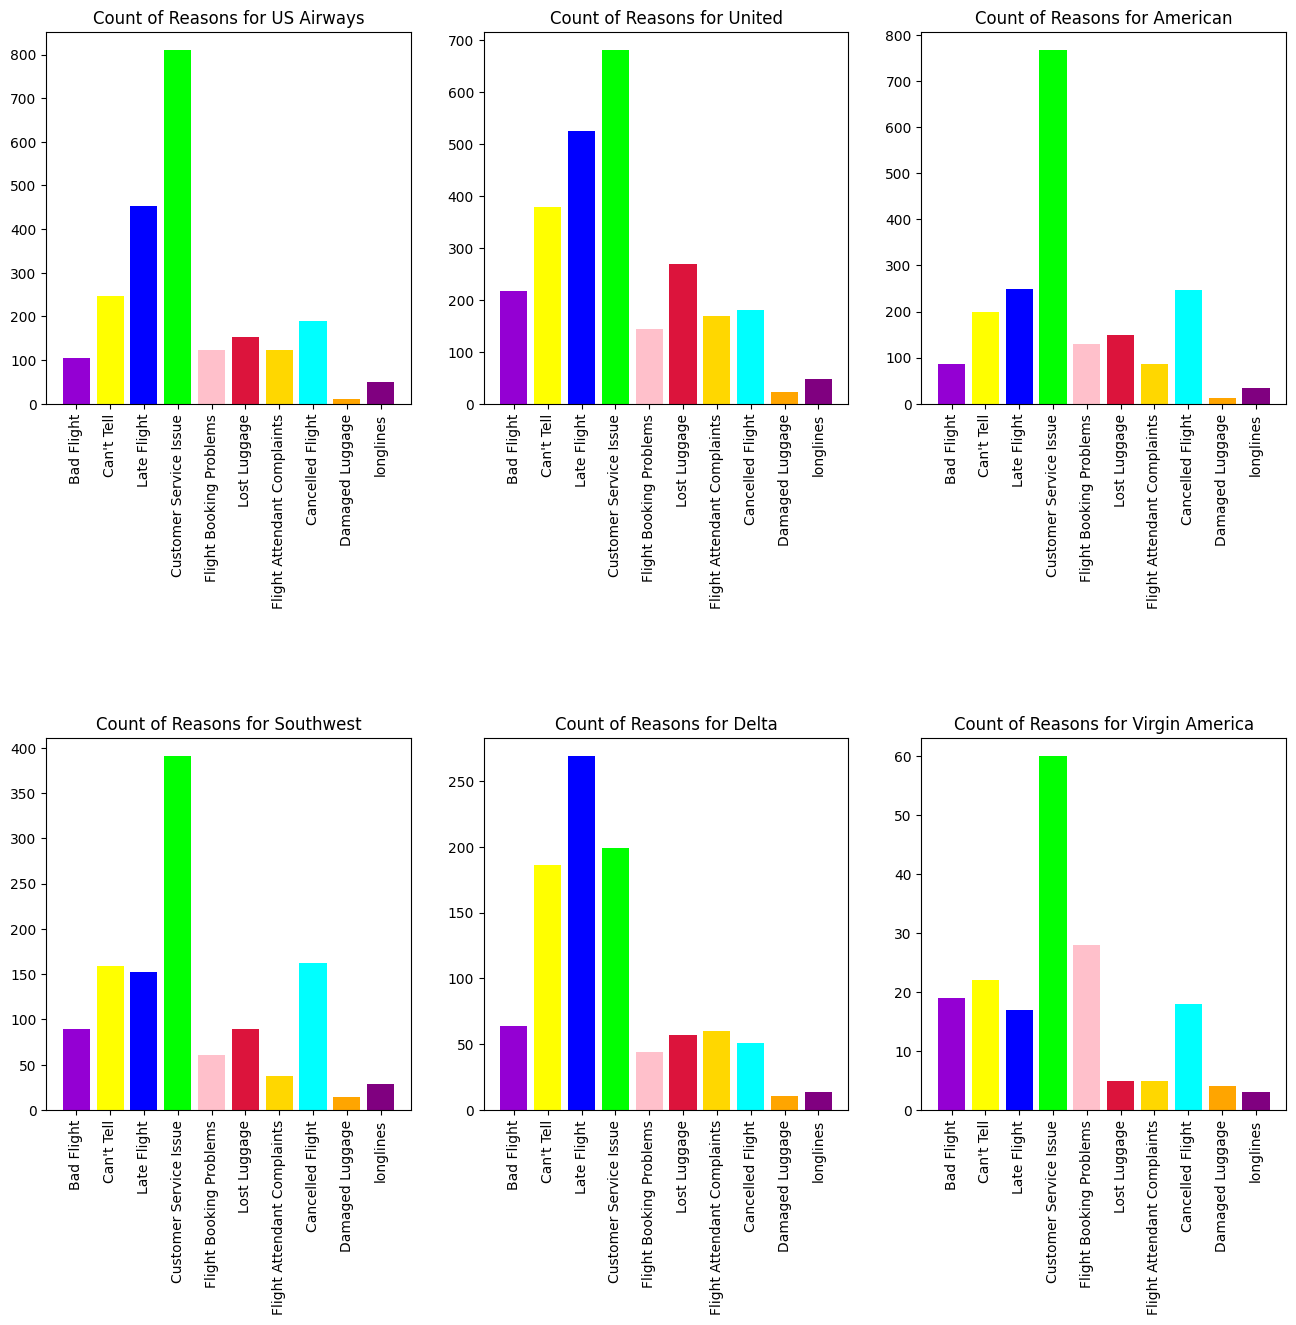

In [23]:
NR_Count=df['negativereason'].value_counts()
def NCount(Airline):
    airlineName =df[df['airline']==Airline]
    count= airlineName['negativereason'].value_counts()
    Unique_reason= df['negativereason'].unique()
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def Plot_Reason(airline):
    a= NCount(airline)
    count=a['count']
    Id = range(1,(len(a)+1))
    plt.bar(Id,count, color=['darkviolet','yellow','blue','lime','pink','crimson','gold','cyan','orange','purple'])
    plt.xticks(Id,a['Reasons'],rotation=90)
    plt.title('Count of Reasons for '+ airline)
    
plt.figure(2,figsize=(16, 14))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    Plot_Reason(i)

## Scpillting Data

In [24]:
positive=df[df['airline_sentiment']=='positive'].text
neutral=df[df['airline_sentiment']=='neutral'].text
negative=df[df['airline_sentiment']=='negative'].text

# Wordcloud 

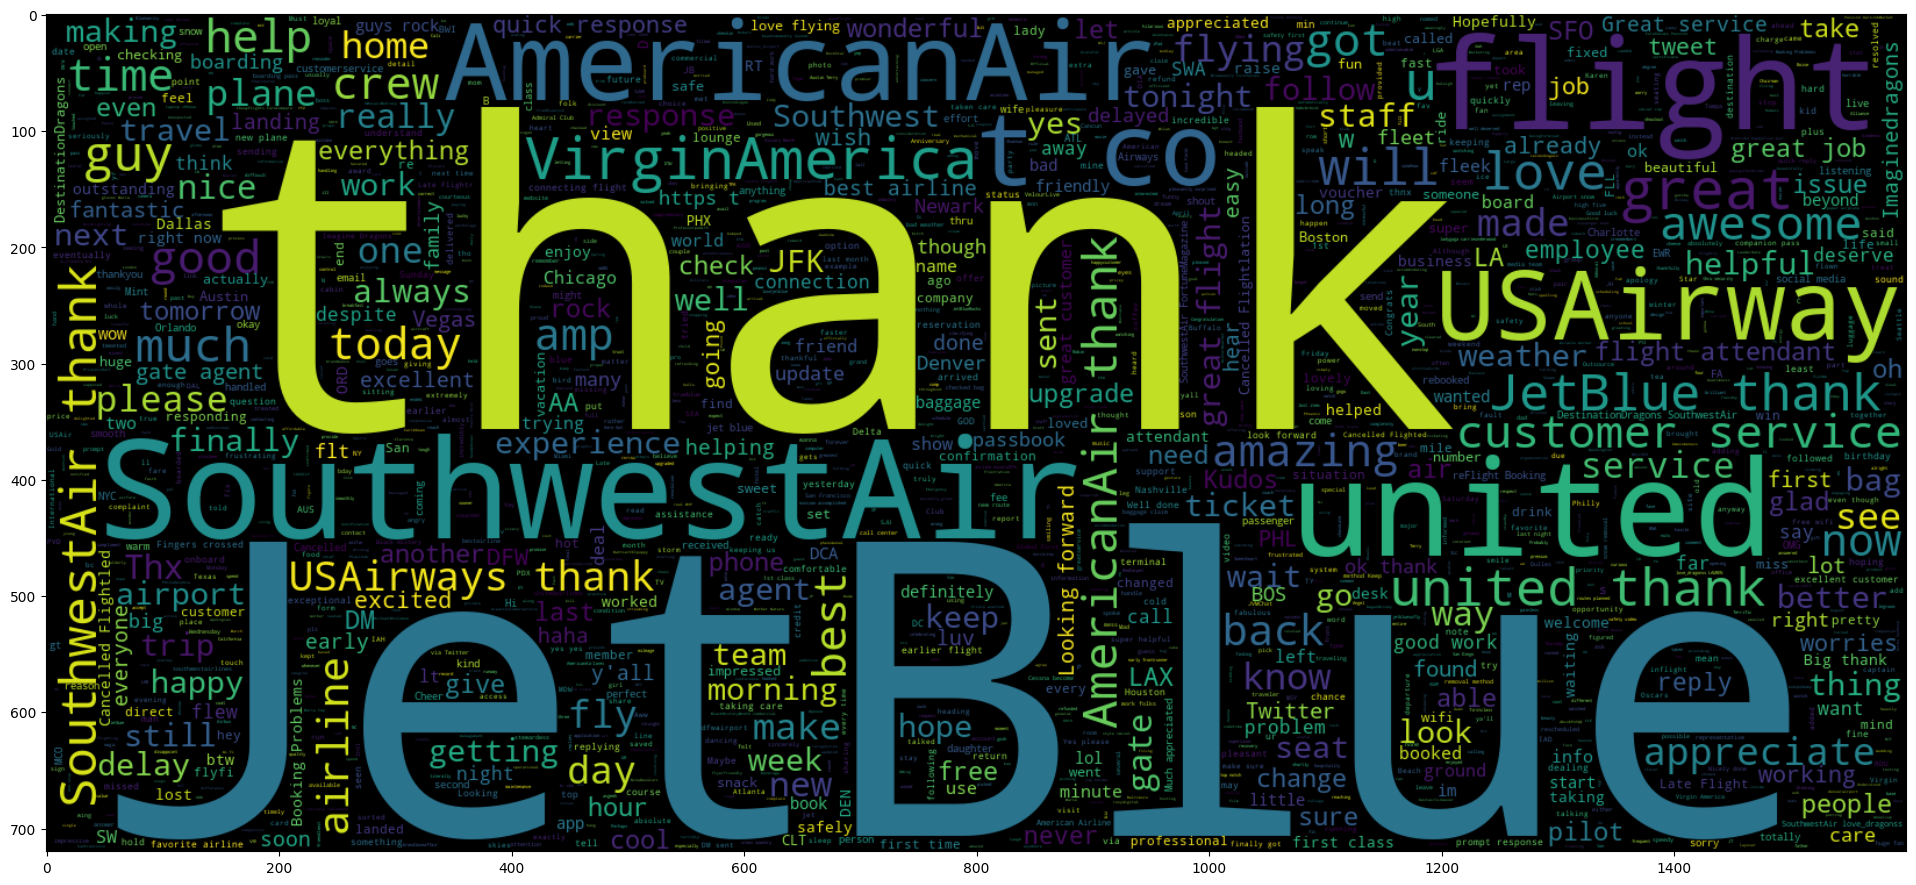

In [25]:
# postve sentiment 
plt.figure(figsize=(24,20))
world_cloud_postive=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate("".join(positive))
plt.imshow(world_cloud_postive,interpolation='bilinear')
ax.grid(False)

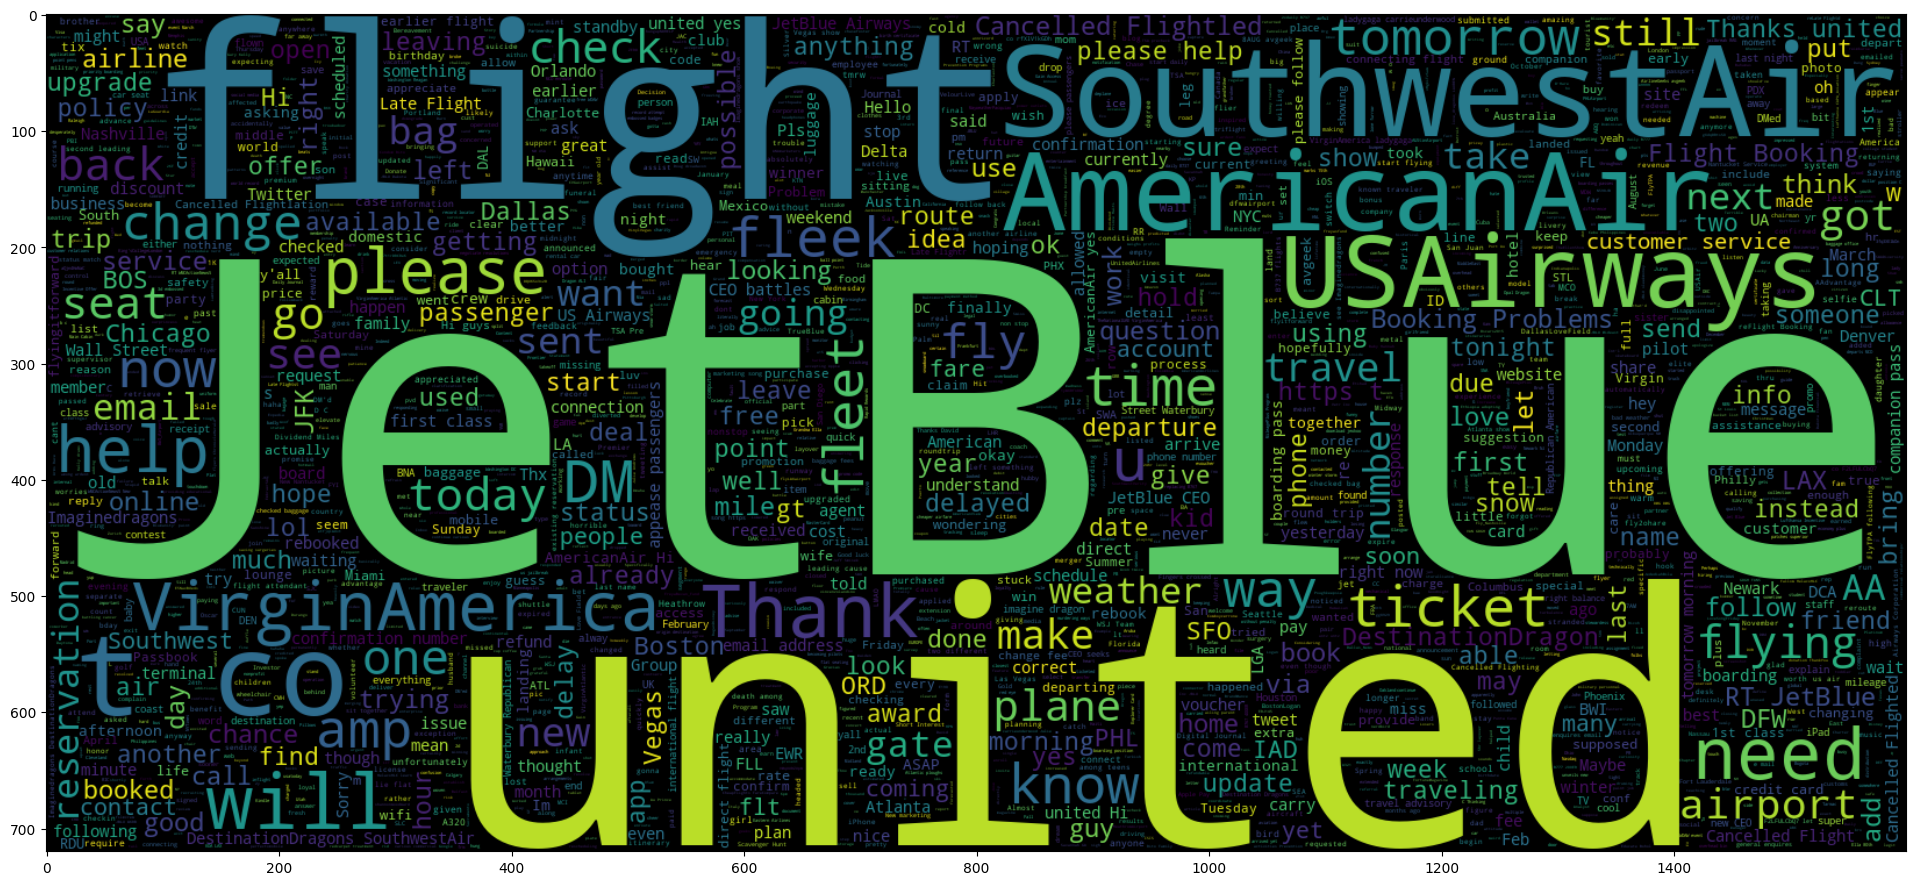

In [26]:
#  Neutral Sentiment
plt.figure(figsize=(24,12))
world_cloud_neutral=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate(" ".join(neutral))
plt.imshow(world_cloud_neutral,interpolation='bilinear')
ax.grid(False)

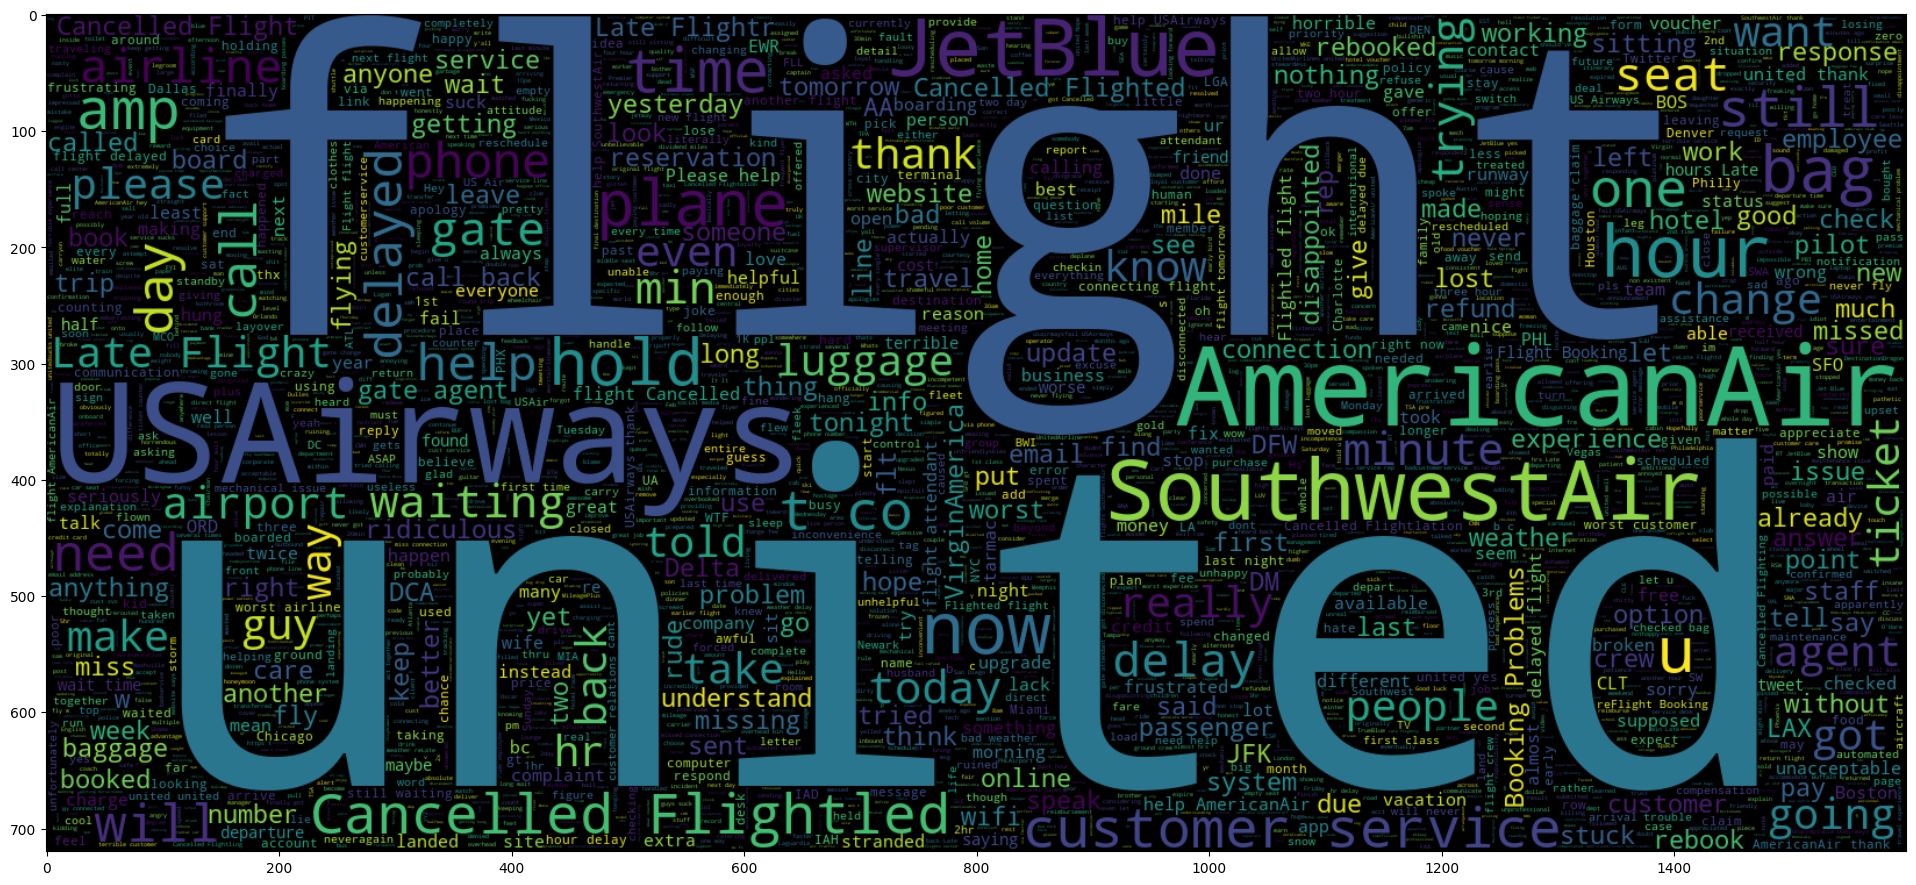

In [27]:
# Negative Sentiment
plt.figure(figsize = (24,12)) 
worldcould_neg = WordCloud(min_font_size = 3,  max_words = 3200 , width = 1600 , height = 720).generate(" ".join(negative))
plt.imshow(worldcould_neg,interpolation = 'bilinear')
ax.grid(False)

# TEXT PREPROCESSING AND CLEANING

In [28]:
# convert Sentiments to 0,1,2
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0

In [29]:
# Apply convert_Sentiment function
df.airline_sentiment = df.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [30]:
df.airline_sentiment

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

In [31]:
import re
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already done
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove html 
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text  

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

# combaine negative reason with  tweet (if exsist)
df['final_text'] = df['negativereason'].fillna('') + ' ' + df['text'] 


# Apply functions on tweets
df['final_text'] = df['final_text'].apply(lambda x : remove_username(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_url(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_emoji(x))
df['final_text'] = df['final_text'].apply(lambda x : decontraction(x))
df['final_text'] = df['final_text'].apply(lambda x : seperate_alphanumeric(x))
df['final_text'] = df['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
df['final_text'] = df['final_text'].apply(lambda x : char(x))
df['final_text'] = df['final_text'].apply(lambda x : x.lower())
df['final_text'] = df['final_text'].apply(lambda x : remove_stopwords(x))

In [33]:
# result
df['final_text']

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        bad flight really aggressive blast obnoxious e...
4                             ca tell really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    customer service issue leaving minutes late fl...
14637            please bring american airlines blackberry
14638    customer service issue money change flight ans...
14639    ppl need know many seats next flight plz put u...
Name: final_text, Length: 14640, dtype: object

In [34]:
X = df['final_text']
y = df['airline_sentiment']

# Apply TFIDF on cleaned tweets

In [35]:
tfidf = TfidfVectorizer()
X_final = tfidf.fit_transform(X)

with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

In [36]:
# Handling imbalanced using SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

In [37]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.2,random_state=42)

# X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.25,random_state=3)

In [38]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)

In [40]:
accuracy_score(random_forest_classifier_prediction,y_test)

0.959324496095878

In [41]:
acc_random_forest = accuracy_score(random_forest_classifier_prediction,y_test)

In [42]:
cr = classification_report(y_test, random_forest_classifier_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1895
           1       0.94      0.94      0.94      1786
           2       0.95      0.94      0.95      1826

    accuracy                           0.96      5507
   macro avg       0.96      0.96      0.96      5507
weighted avg       0.96      0.96      0.96      5507



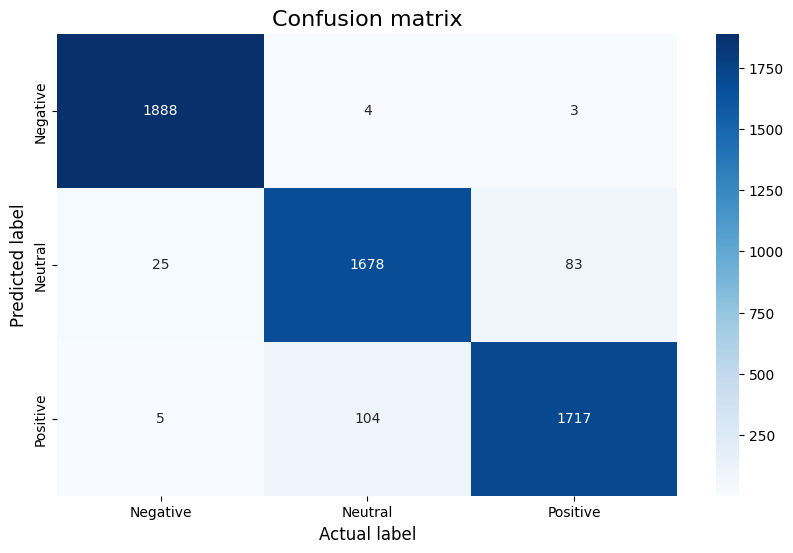

In [43]:
print("Classification Report:\n----------------------\n", cr)

cm = confusion_matrix(y_test,random_forest_classifier_prediction)


# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

In [44]:
# Saving model : Random Forest
# Assuming 'model' is your trained model
with open('model_random_forest.pkl', 'wb') as file:
    pickle.dump(random_forest_classifier, file)

# Support Vector Machine 

In [45]:
# Support vector machine 
#training SVM model with linear kernel
#Support Vector Classification-wrapper around SVM
from sklearn.svm import SVC
model_svc = SVC(kernel='linear', random_state =42)
model_svc.fit(X_train, y_train)
#predicting output for test data
pred_svc = model_svc.predict(X_test)

In [46]:
#accuracy score
accuracy_score(y_test,pred_svc)

0.9061194842927184

In [47]:
acc_svm = accuracy_score(y_test,pred_svc)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1895
           1       0.81      0.93      0.87      1786
           2       0.93      0.79      0.85      1826

    accuracy                           0.91      5507
   macro avg       0.91      0.91      0.90      5507
weighted avg       0.91      0.91      0.91      5507



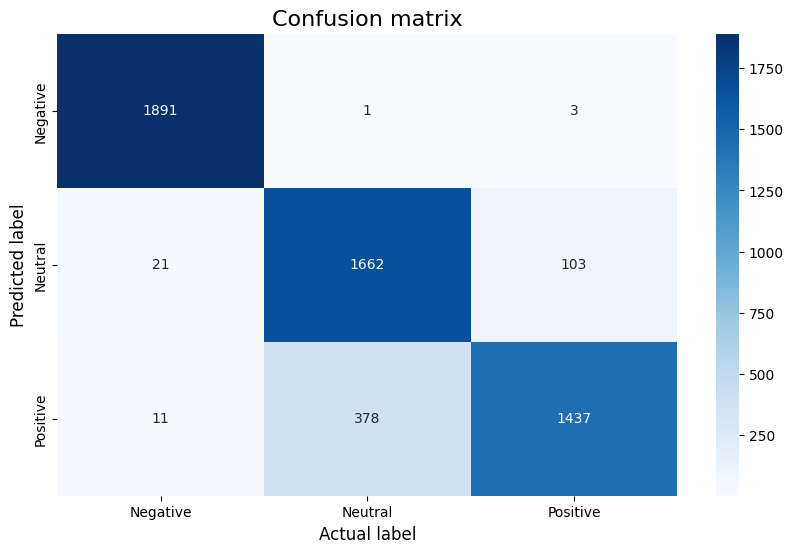

In [48]:
cr = classification_report(y_test, pred_svc)

print("Classification Report:\n----------------------\n", cr)

cm = confusion_matrix(y_test,pred_svc)

# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

In [49]:
# Saving model : SVM
# Assuming 'model' is your trained model
with open('model_SVM.pkl', 'wb') as file:
    pickle.dump(model_svc, file)

## XGBoost

In [50]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [51]:
xgb_prediction =  xgb.predict(X_test)

In [52]:
accuracy_score(xgb_prediction,y_test)

0.9255493008897766

In [53]:
acc_xgb =accuracy_score(xgb_prediction,y_test)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1895
           1       0.88      0.90      0.89      1786
           2       0.91      0.88      0.89      1826

    accuracy                           0.93      5507
   macro avg       0.92      0.92      0.92      5507
weighted avg       0.93      0.93      0.93      5507



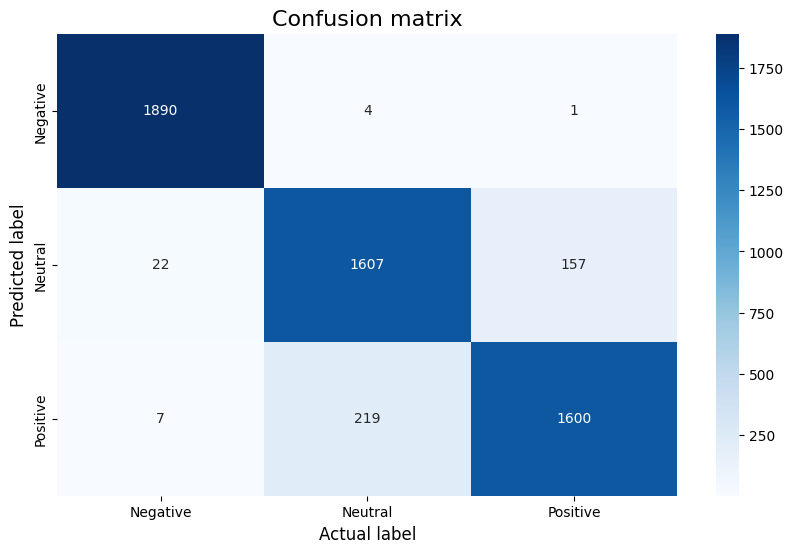

In [54]:
cr = classification_report(y_test, xgb_prediction)

print("Classification Report:\n----------------------\n", cr)

cm = confusion_matrix(y_test,xgb_prediction)

# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

In [55]:
#Saving model : XGbost
# Assuming 'model' is your trained model
with open('model_SVM.pkl', 'wb') as file:
    pickle.dump(xgb, file)

# Conclusion

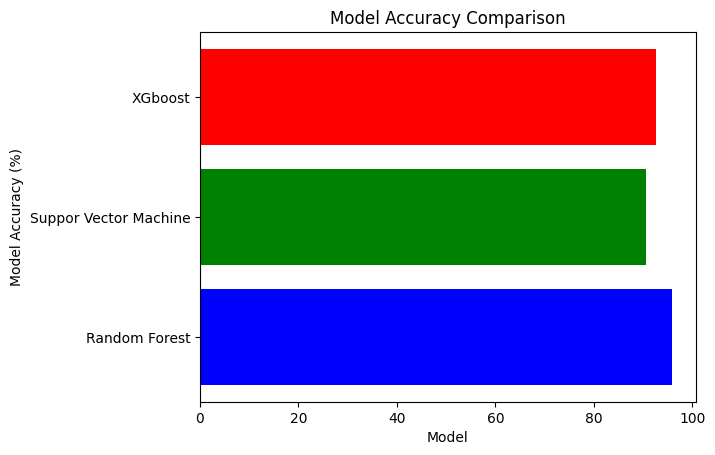

In [56]:
# visualize model performance

y = [acc_random_forest*100, acc_svm*100, acc_xgb*100]

x = ['Random Forest', 'Suppor Vector Machine', 'XGboost']

colors = ['blue', 'green', 'red']


plt.barh(x,y, color = colors)
plt.xlabel("Model")
plt.ylabel("Model Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.show()

In [57]:
import plotly.express as px
import pandas as pd

# Data
y = [acc_random_forest * 100, acc_svm * 100, acc_xgb * 100]
x = ['Random Forest', 'Support Vector Machine', 'XGBoost']
colors = ['blue', 'green', 'red']

# Create DataFrame
df = pd.DataFrame({'Model': x, 'Accuracy': y, 'Color': colors})

# Plot
fig = px.bar(df, x='Model', y='Accuracy', color='Color',
             color_discrete_map={'blue': 'blue', 'green': 'green', 'red': 'red'},
             text=df['Accuracy'].apply(lambda x: f'{x:.2f}%'))

# Update layout for labels
fig.update_traces(textposition='outside')
fig.update_layout(title='Model Accuracy Comparison',
                  xaxis_title='Model',
                  yaxis_title='Model Accuracy (%)',
                  showlegend=False)

fig.show()